# CH4. Django의 핵심 기능

## 1. Admin 사이트   

: 데이터 베이스의 데이터를 쉽게 관리할 수 있도록 데이터의 생성, 조회, 변경, 삭제 등의 기능을 제공

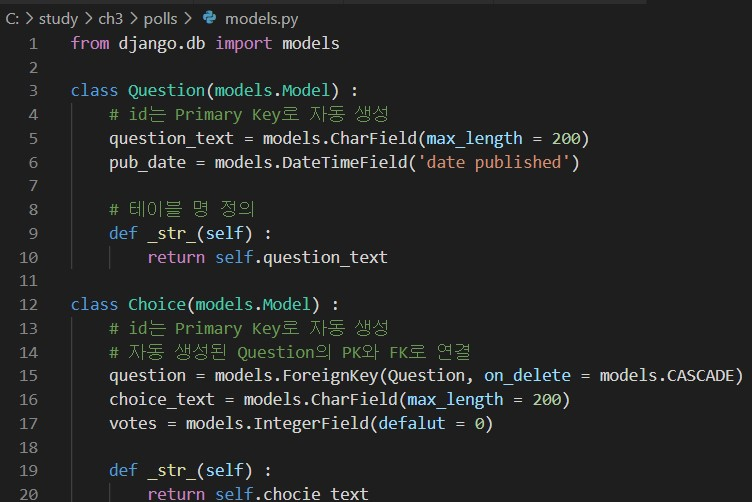

**이전에 작성했던 테이블 코드 (models.py)**

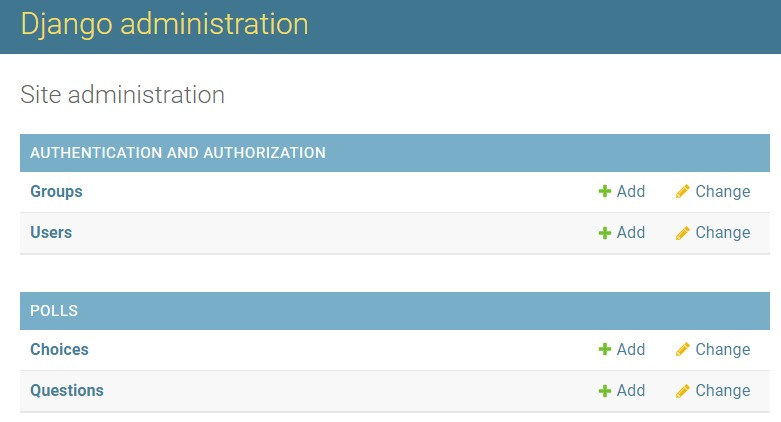

**Admin 페이지에 반영된 테이블 생성 코드**

> **내가 생성한 Questions DB**   
> * +Add : 데이터 생성 (CREATE)   
> * +Change : 데이터 변경 (UPDATE)

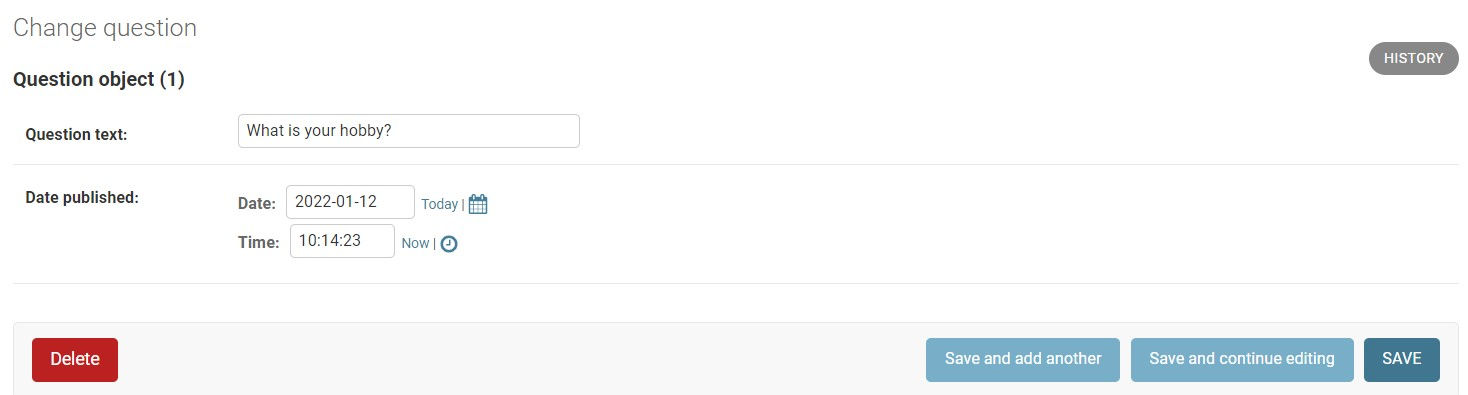

**생성한 DB 상세 화면**

> **내가 생성한 Question 테이블**   
> Delete : 데이터 삭제 (Delete)

> **작성했던 Question 테이블의 코드**   
> question text = models.CharField(max_length = 200)   
> pub_date = models.DateTimeField('date published')   

## 1) 필드의 순서를 변경하여 UI 순서 바꾸기

: admin.py 코드를 수정한다.

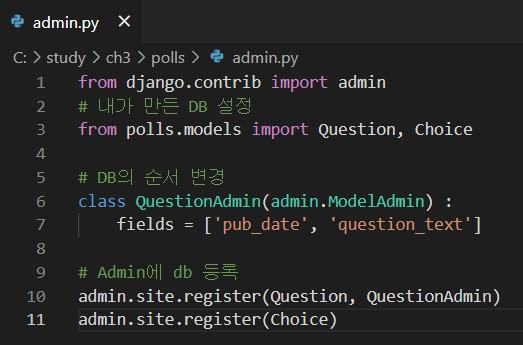

**Field 순서 코드 추가, 두번째 인자로 활용**

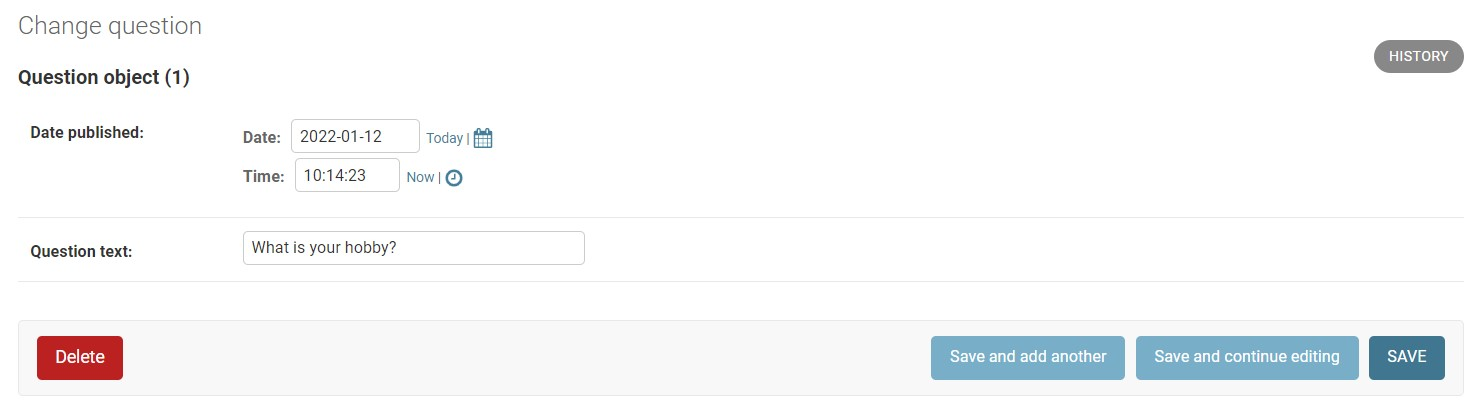

**수정된 Admin UI 순서**

## 2) 필드를 분리하여 보여주기

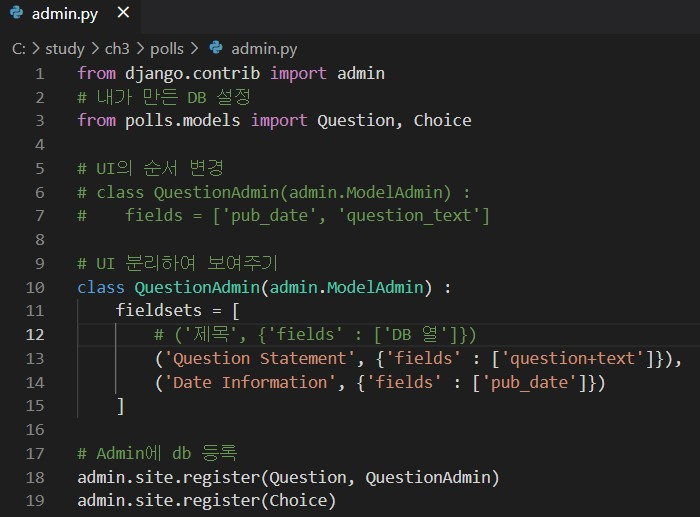

**Fieldsets에 분리해 줄 UI의 제목과 포함하는 fields를 기입하여 필드를 분리해줌**

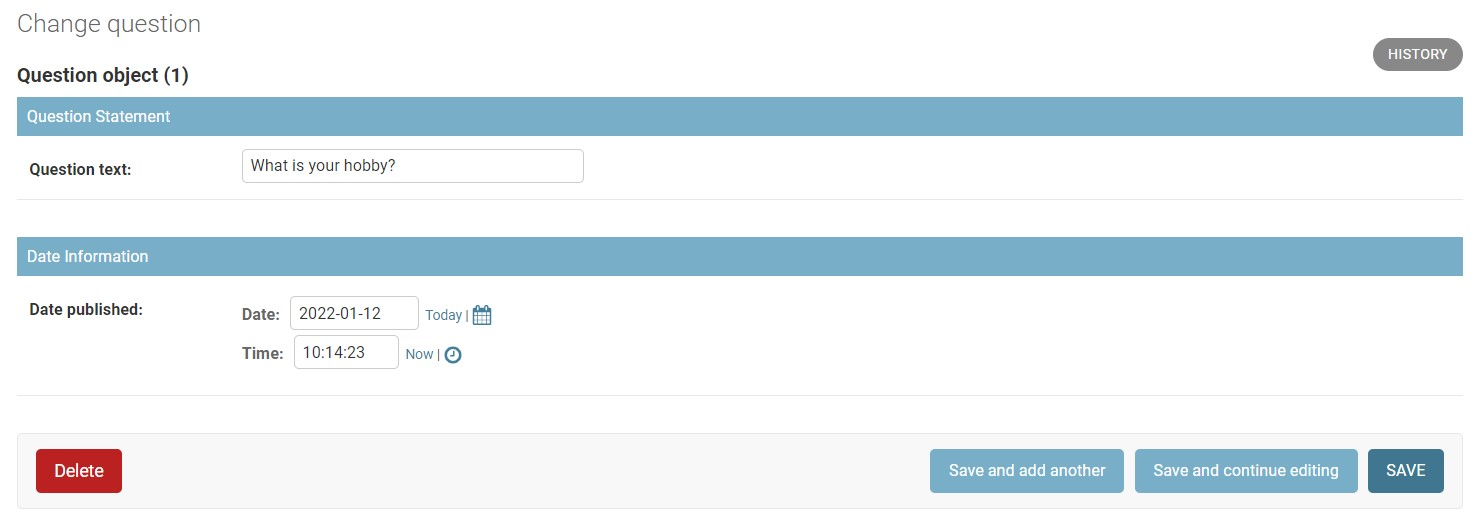

**제목에 맞춰 분리된 UI**

## 3) 필드 접기

:필드의 개수가 많아 폼이 길어진 경우에 유용

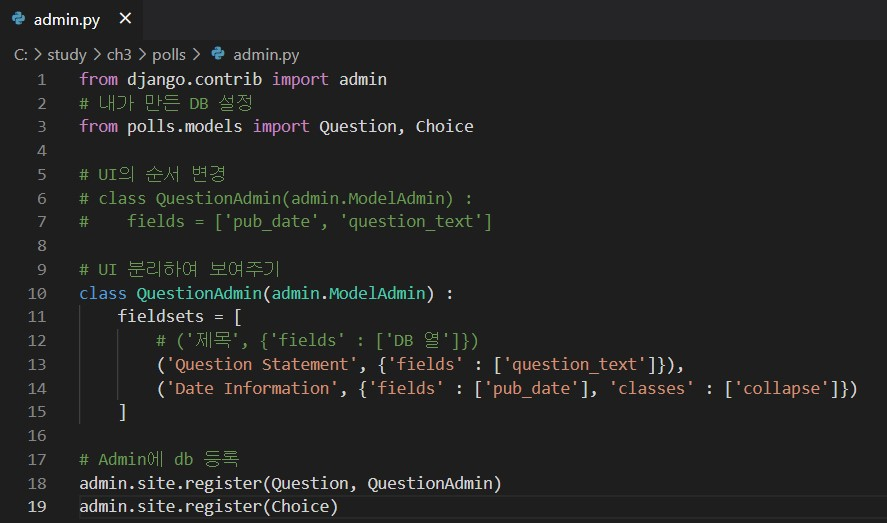

**접고 싶은 field에 'classes' 목록 추가**

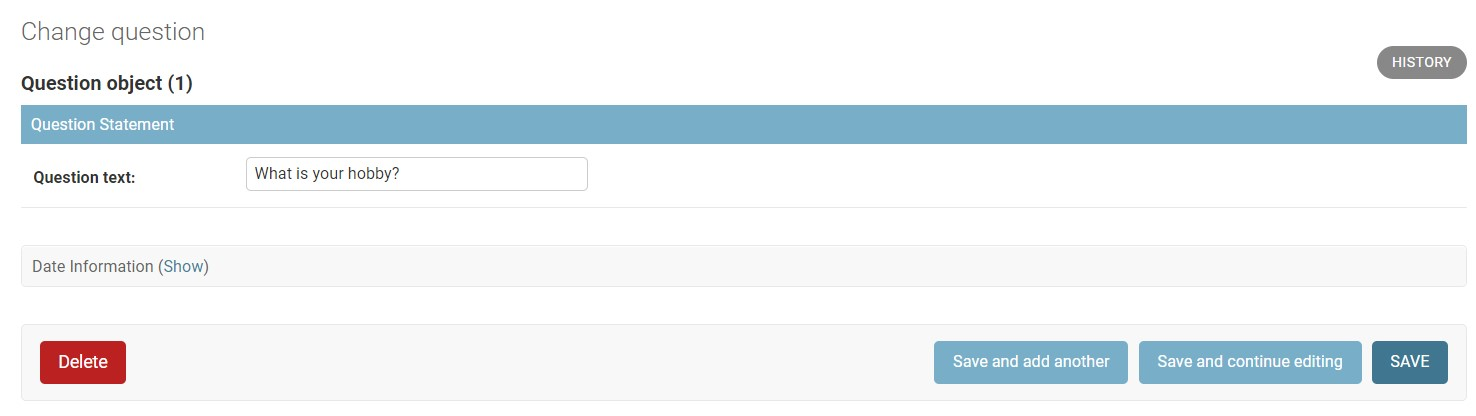

**Date Information에 SHOW/HIDE 기능 추가**

## 4) 외래키 관계 화면

: Question DB와 1:N 관계로 엮여있는 Choice DB 수정하기

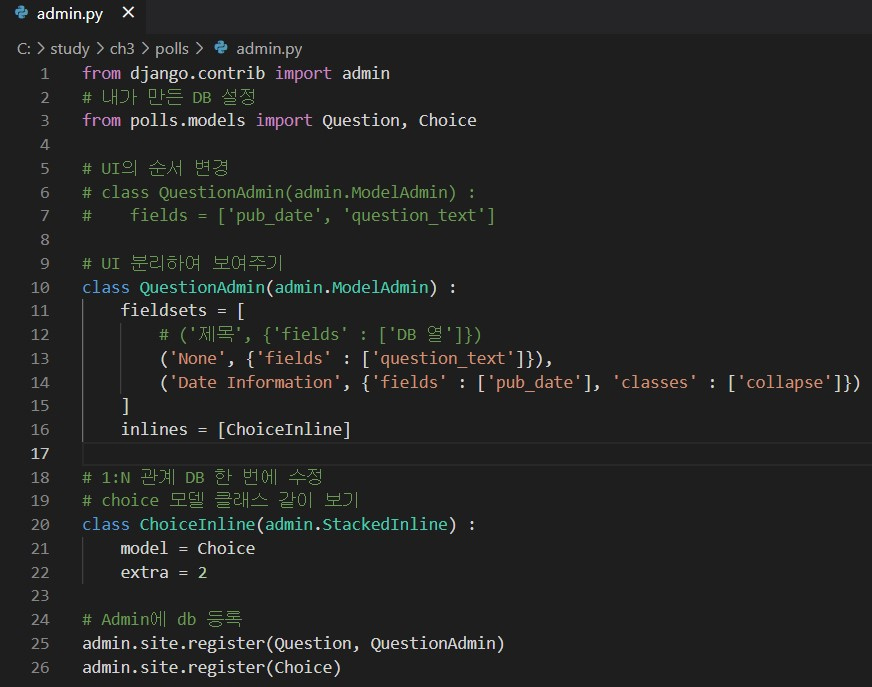

**외래키로 엮인 2개의 테이블 한 번에 보기**

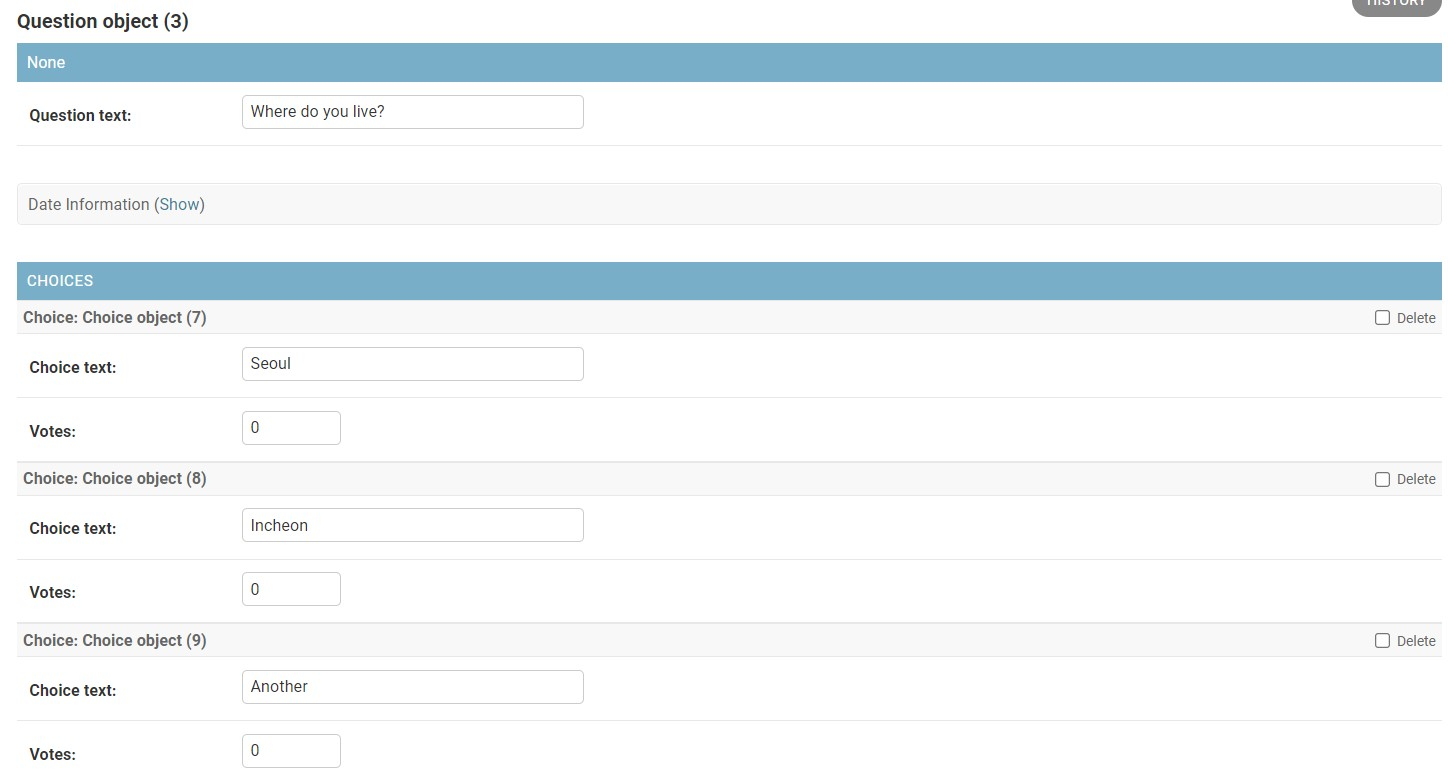

**Question에 엮인 여러 개의 외래키 Choice가 모두 보여짐**   
**StackedInline을 TabularInline으로 적용해도 같은 결과**

## 5) 레코드 리스트 컬럼 지정

: Question 테이블 조회 시 보여지는 컬럼 항목의 순서 지정 가능

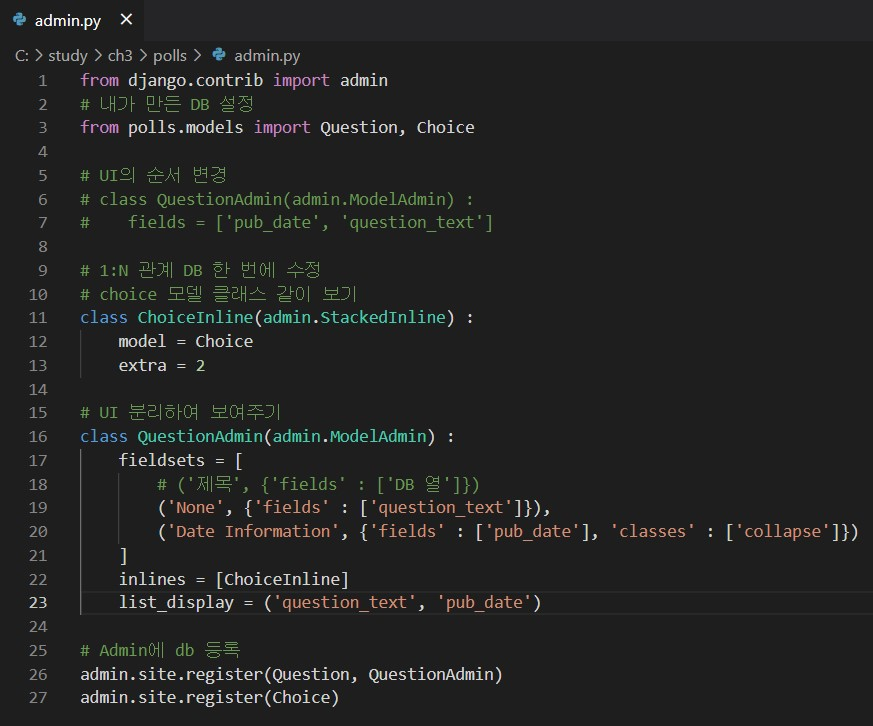

**컬럼의 순서를 지정하는 display_list 항목 추가**

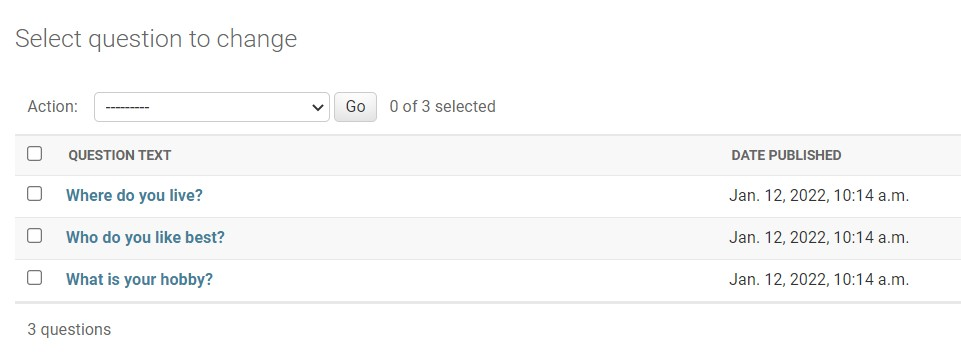

**pub_date 항목이 추가됨**

## 6) DB 검색 박스 추가

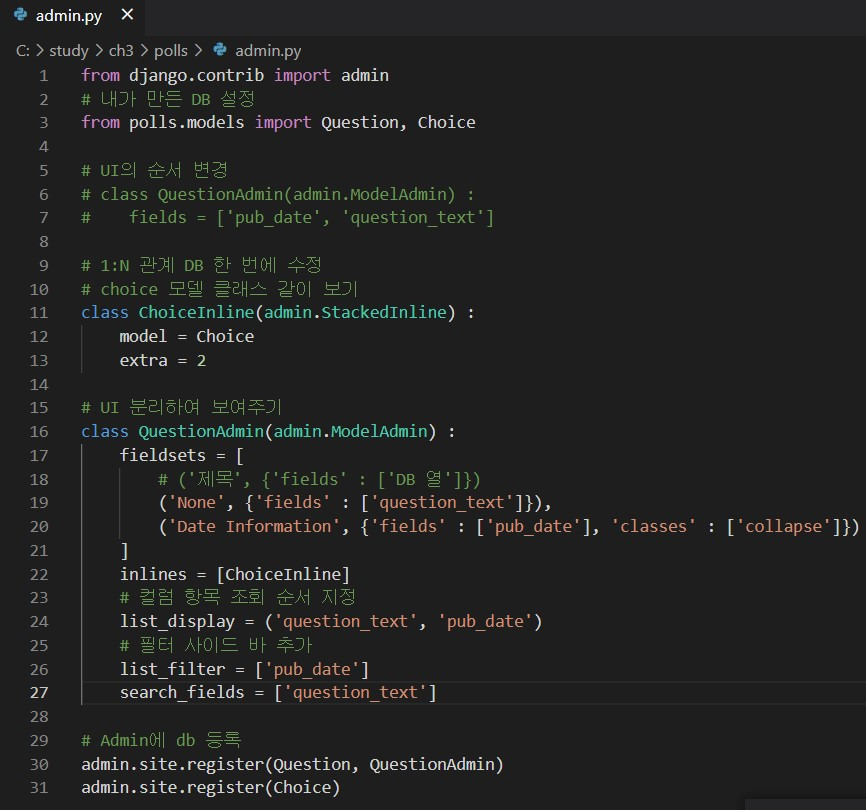

**list_filter와 search_fields 코드 추가**

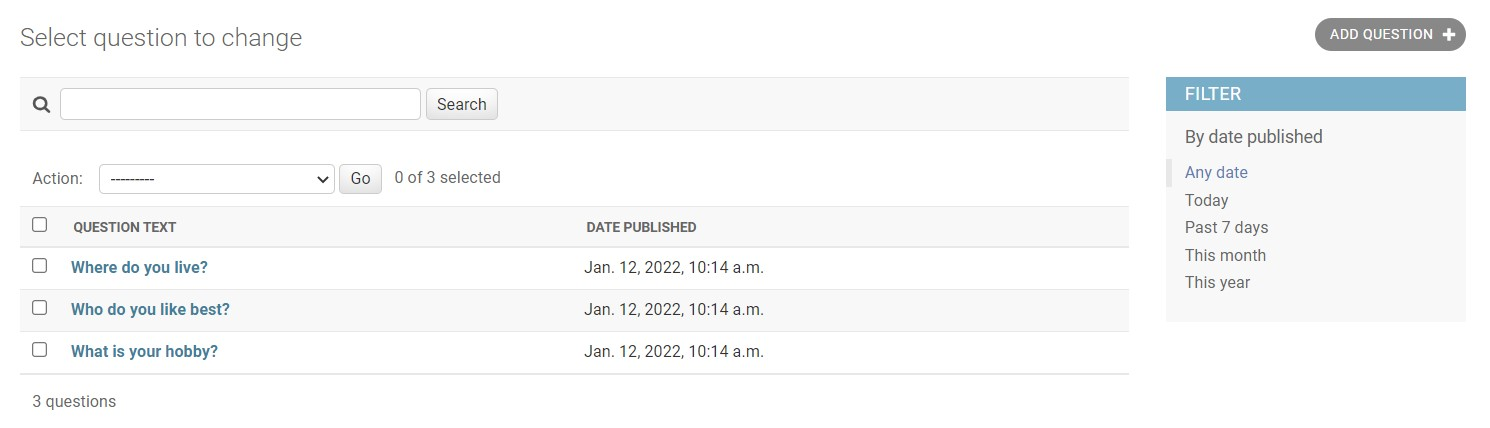

**question_text를 이용하여 검색하는 박스와 pub_date로 필터링하는 박스 추가**

## 7) Admin 사이트를 취향에 맞게 템플릿 수정

: 새로 만든 프로젝트 템플릿 디렉토리를 settings.py에 등록하여 장고가 찾을 수 있도록 함

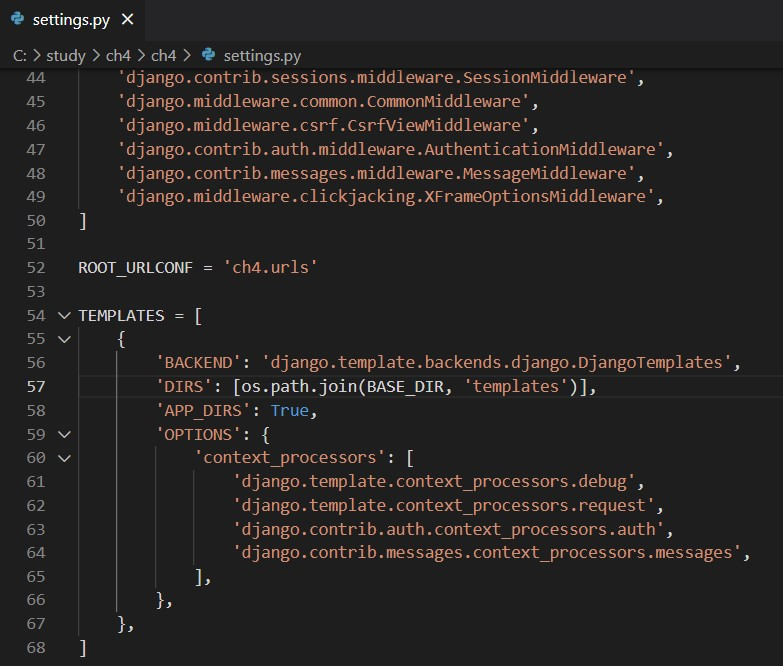

**Settings.py의 DIR 수정하여 templates 폴더 변경**

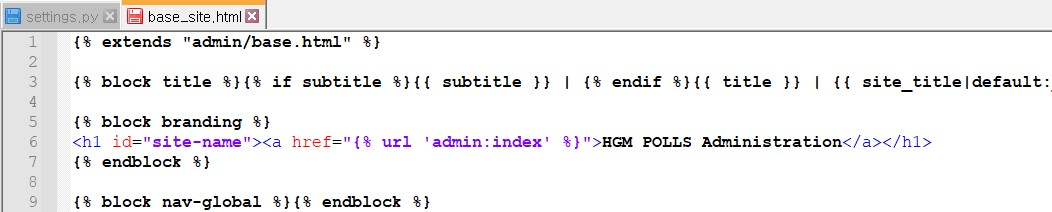

**Django의 파일에서 복사해온 base_site.html 파일의 제목 수정**

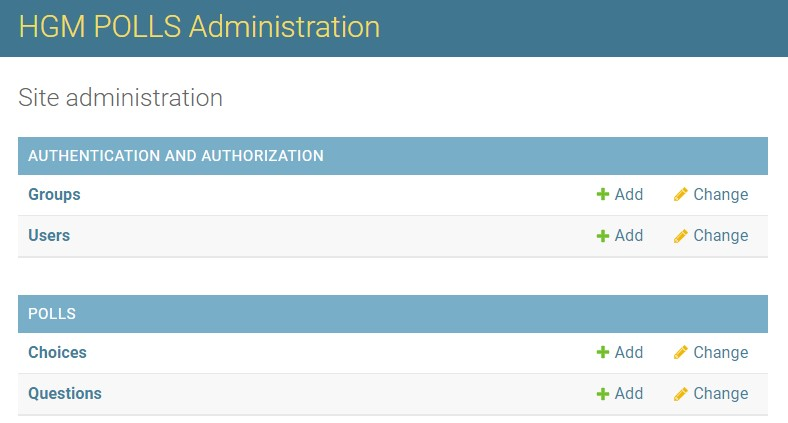

**수정된 admin 페이지의 제목**

# 2. Django Python Shell

: 조건 검색 등의 더 다양한 데이터 관리 명령을 제공

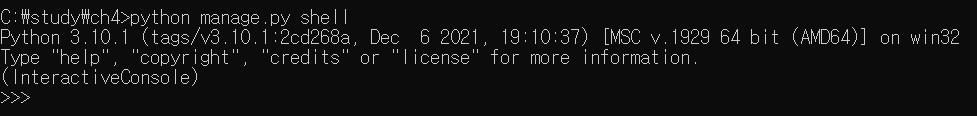

**python shell 열기**

## 1) 데이터 생성 / 입력 (CREATE)

: 객체를 생성한 후 SAVE() 시킴

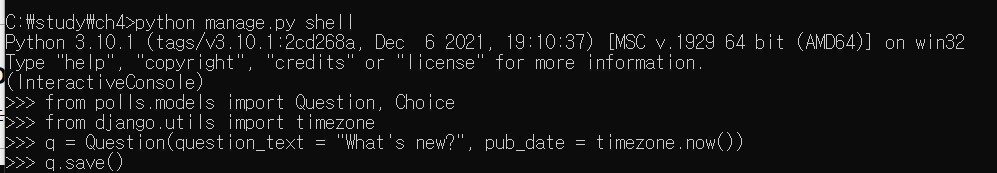


**python shell에서 데이터 생성하기**   
> 1. 원하는 테이블에 입력할 데이터 변수 지정   
> 2. save() 시키기

## 2) 데이터 조회 (Read)

: **QuerySet** 객체를 사용하여 필터링한 조건에 맞는 레코드만 추출   
QuerySet = SELECT문 & 필터링 = WHERE문   

* QuerySet : 데이터 베이스 테이블로부터 꺼내 온 여러 객체의 모임(콜렉션)   
* objects : 테이블 정보를 담고 있는 객체, 조회 결과를 담는 QuerySet을 얻게 해줌   
* filter : 주어진 조건에 맞는 객체들을 담고 있는 QuerySet 콜렉션을 반환   
* exclude : 주어진 조건에 맞는 객체들을 제외한 QuerySet 콜렉션을 반환

> **데이터 조회 명령어**   
> **테이블 이름.레코드 항목.조회 방식()**   
> 1. Question.objects.all() : Question 테이블의 모든 항목 조회
> 2. Question.objects.filter(question_text__startswith = 'What') : Question 테이블에서 question_text 항목이 'What'으로 시작하는 데이터만 조회   
> 3. Question.objects.exclude(pub_date__get = datetime.date.today() : Question 테이블에서 pub_date 항목이 오늘인 데이터를 제회하고 조회   
> 4. Question.objects.get(pk = 1) : Question 테이블에서 pk가 1인 데이터만 조회   
> 5. Question.objects.all()[:5] : Question 테이블에서 0~5까지의 데이터 조회 (**리스트로 조회됨**)

## 3) 데이터 수정 (Update)

: save(),update() 메소드를 호출하여 수정 = UPDATE에 해당

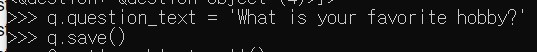

**q의 question_text 항목 수정**   
* 참고 : q = Question(question_text = "What's new?", pub_date = timezone.now())

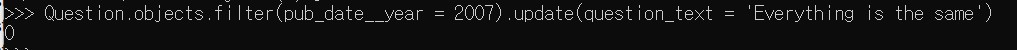

**여러 개의 데이터를 필터링하여 수정**   
0개의 데이터가 수정됨

## 4) 데이터 삭제 (Delete)

: delete() 메소드를 사용하여 수정

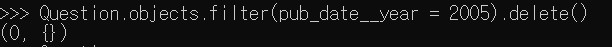

**삭제하고 싶은 데이터를 필터링하여 삭제**   
* 모든 데이터 삭제 : Question.objects.all().delete()

# 3. 템플릿 시스템

## 1) 템플릿 변수

> **{{ variable }}** 의 형식으로 선언   
+ 변수가 사전에 정의되지 않은 경우, 빈 문자열로 대체됨    
(이 값을 변경하고 싶으면, settings.py의 TEMPLATE_STRING_IF_INVALID 속성 변경

## 2) 템플릿 필터

: 추가적 명령으로 최종 결과를 변경시킴   

> **{{ 변수명 | 필터함수 }}** 형식으로 선언

* 1. 1개의 필터 이용   
: **{{ name | lower }}**
  name 변수의 모든 문자를 소문자로 변경

* 2. 2개의 필터 이용   
: **{{ text | escape | linebreaks }}**
  text 변수의 특수 문자를 탈출 시키고 줄바꿈 시킴   
  
* 3. 인자를 가진 필터
: **{{ bio | truncatewords : 30}}**
 bio 변수에서 앞의 30개 단어만 보여줌   
 
* 4. 빈칸이 있는 인자를 가진 필터
: **{{ list | join : " // " }}**
 list 변수를 " // "로 각자 합쳐줌   
 
> **필터의 종류**   
> 1. lower : 모든 문자를 소문자로 변경시킴   
> 2. escape : 특수 문자만 보여줌   
> 3. truncatewords : 단어로 분리시켜줌   
> 4. join : 결과를 원하는 인자로 합쳐줌   
> 5. defalut : 결과가 없거나 False이면 원하는 인자로 반환시켜줌   
> 6. length : 변수의 길이를 반환시켜줌   
> 7. striptags : 변수값에서 HTML 태그를 없애줌 (100% 없애진 못함)   
> 8. pluralize : 변수 값이 1이 아니면 복수 접미사를 인자로 하여 붙여줌   
> 9. add : 변수값에 인자값을 더해줌 (**타입에 주의**)

## 3) 템플릿 태그

: 텍스트 결과물을 만들거나, 템플릿 로직을 제어하기도 하며, 외부 파일을 템플릿 내로 로딩하여줌

> **{% tag %}** 형식을 지님   
> 1. {% for %} ~ {% forend %} : 리스트 항목을 순회하며 출력   
     {% for athlete in athlete_list %}   
         <li> {{ athlete.name }} </li>   
     {% endfor %}   
     
> 2. {% if %} ~ {% elif % } ~ {% else %} ~ {% endif %} : 변수를 평가하여 TRUE이면 출력   
    **(필터, 불린 연산자와 함께 이용 가능)**   
     {% if athlete_list %}   
         Number of athletes : {{ athlete_list | length }}   
     {% elif athlete_in_locker_room_list %}   
         Athletes should be out of the locker room soon!   
     {% else %}   
         No athletes.   
     {% endif %}    
     
> 3. {% csrf_token %} : POST 방식을 이용하는 Form에서 CSRF 공격을 방지하기 위하여 이용 (FORM 엘리먼트의 첫 줄 다음에 기입)   
    
> 4. {% url %} : url을 하드코딩 하는 것을 피하게 해줌   
     {form action = "{% url 'polls : vote' question.id %}" method = "POST">   
     
> 5. {% with %} ~ {% endwith % } : 특정 값을 변수에 저장해두는 기능   
     {% with total = bussiness.employees.count %}   
         {{ total }} people works at bussiness   
     {% endwith %}   
     
> 6. {% load %} : 사용자 정의 태그 및 필터를 로딩해줌   
     {% load somelibrary package.otehrlibraray %}   
     (somelibrary.py 및 package/otherlibrary.py에 정의된 태그를 로딩)

## 4) 템플릿 주석

> 1. 한 줄 주석   
> : **{# 주석 #}** 형식 이용   
>   {# greeting #} hello   

> 2. 여러 줄 주석   
> : **{% comment 주석 %}** 태그 이용   
>  {% comment "Optional note" %} ~ {% endcomment %}

## 5) HTML 이스케이프

: 템플릿 코드를 렌더링하여 HTML 코드를 만들었을 때, HTML의 태그를 제대로 인식하지 못하고 자동으로 이스케이프 되는 것을 방지하기 위함

> **safe 필터 이용**   
> This will not be escaped : {{ data | safe }}

> **자동 이스케이프 방지**   
> {% autoescape off %}   
> Hello {name}   
> {% endautoescape %}   

> **자동 이스케이프 방지를 끈 경우**   
> name = "<b>username"
> Hello, {{ name }}      
> Hello, <b>username   
    
> **스트링 리터럴의 경우**   
> {{ data : default : "3 &lt; 5" }}   
> 1. < : &lt;   
> 2. 왼쪽 < : &gt;    
> 3. ' : &#39;   
> 4. " : &quot;   
> 5. & : &amp;   
> 예약된 의미를 제거해줌

## 6) 템플릿 상속

: 상속을 통하여 코드를 재사용할 수 있고, 사이트의 룩앤필을 일관성 있게 보여줄 수 있음.

**부모 템플릿**   
: 템플릿의 뼈대를 만든 후, {% block %} 태그를 통해 하위로 상속해줄 부분을 지정해줌   

**자식 템플릿**   
: 부모 템플릿의 뼈대는 그대로 재사용하고, {% block 부분만 채워주면 됨

> **순서**   
> 1. 전체 사이트의 공통사항을 담은 parent.html을 만듬   
> 2. parent.html을 이용하는 child.html들을 만듬   
> 3. child.html들을 이용한 개별 페이지를 제작함

> **주의사항**   
> 1. {% extends %}는 태그 중에 항상 가장 먼저 사용되어야 함   
> 2. 부모 템플릿에 {% block %} 태그가 많을수록 좋음   
> 3. 부모 템플릿의 블록 내용을 이용하고 싶다면 {{ block.super }} 변수를 이용   
> -> **부모 템플릿을 이용하면서 내용을 추가하고 싶은 경우에 이용**   
> 4. 가독성을 위하여 {% endblock content %}처럼 블록명을 기입

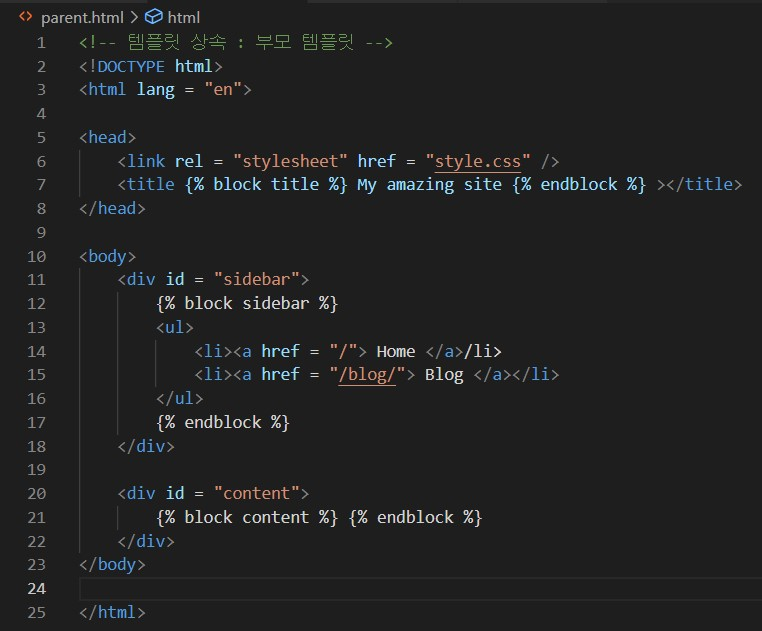

**부모 템플릿에 공통적으로 쓰이는 부분을 넣음**

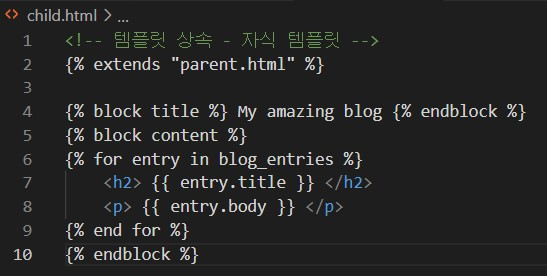

**상속 받은 block에 자세한 사항을 기입함**

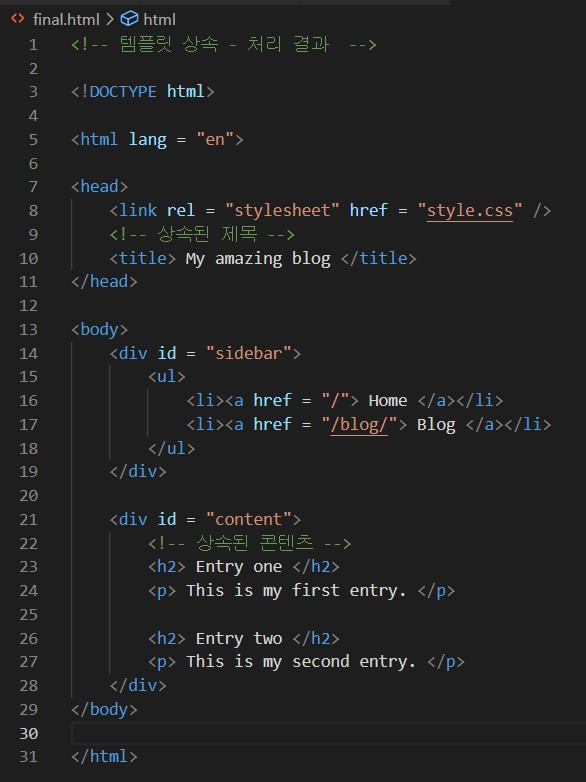

**상속된 결과**

# 4. 폼 처리하기

## 1) HTML과 장고의 폼

> **HTML의 폼**   
> **<form> ... </form>**   
> input : 텍스트 입력 등의 폼 엘리먼트 지정하고 데이터를 입력받음   
> action : 데이터를 어디로 보낼지 지정   
> method : 어떤 HTTP 메소드로 보낼지 결정

> **method**   
> 1. GET : 서버 시스템의 상태를 바꾸지 않는 요청   
    > -> 로그가 보이기 때문에 보안에 취약   
    > -> 검색 폼 이용에 적절   
>    
> 2. POST : 서버 시스템의 상태를 바꾸는 요청   
    > -> **장고는 POST 방식만을 이용**   
    > -> 로그를 감추기 때문에 보안에 탁월
    
> **장고의 폼**   
> 
> 폼 클래스 : 폼을 기술하고, 폼이 어떻게 작동하고 보이는지를 결정   
> 폼 클래스의 필드 : HTML 폼의 input에 해당, 필드도 역시 클래스로서 자신의 데이터에 대한 유효성 검사를 실시함   
> ex. DataField, FileField 등   

> **폼의 종류**   
>
> 1. 언바운드 폼 : 객체를 만들 때, 데이터를 없이 만듬 (비어있거나 디폴드 값으로 채워짐)   
> 2. 바운드 폼 : 제출된 데이터를 갖고 있어서 데이터의 유효성 검사 시 이용됨

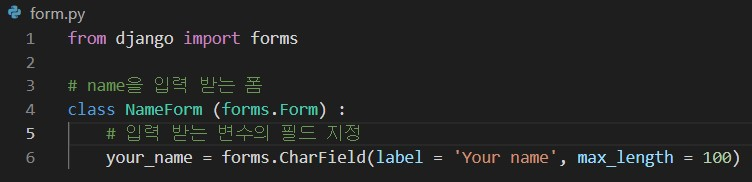

**폼을 정의하는 클래스 작성**

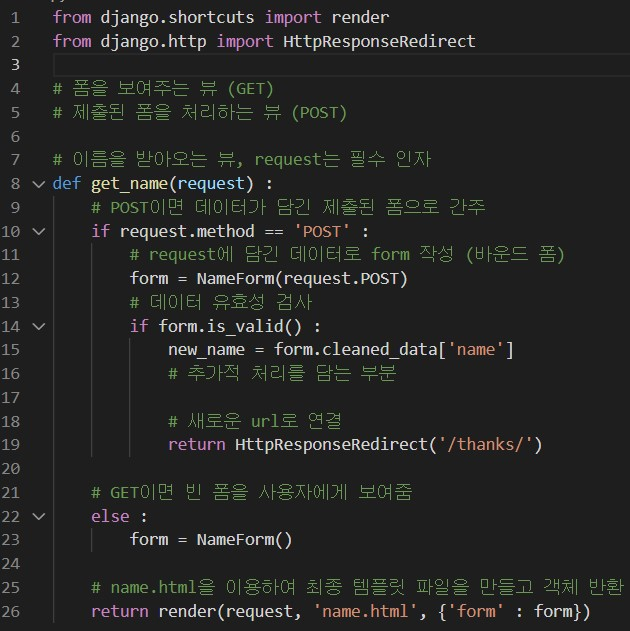

**정의된 클래스를 이용하여 폼의 객체를 생성하는 뷰 함수 작성**

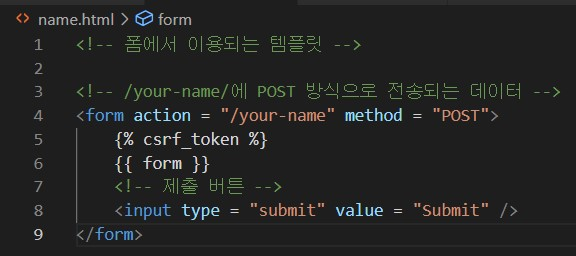

**생성된 폼 객체를 이용하여 템플릿에서 아용**

> **{{ form }}의 종류**   
> 1. {{ form.as_table }} : "<tr> </tr>" 태그로 감싸서 테이블 셀로 렌더링 (= form 태그)   
> 2. {{ form.as_p }} : "<p> </p>" 태그로 감싸서 렌더링   
> 3. {{ form.as_ul }} : "<li> </li>" 태그로 감싸서 렌더링

> **렌더링 결과**   
<label for = "your_name"> Your name : </label>
<input id = "your_name" type = "text" name = "your_name" maxlength = "100">
<input type = "submit" value = "Submit" />

> **HTML로 작성**   
 <form action = "/your-name/" method = "POST">
        <label for = "your_name"> Your name : </label>
        <input id = "your_name" type = "text" name = "your_name" value = "{{ current_name }}">
        <input type = "submit" value = "OK">

# 5. 클래스형 뷰

: 뷰는 응답을 반환해주는 호출 가능한 객체로, 함수 혹은 클래스로 작성할 수 있음

**클래스형 뷰가 더 효과적**   
: 상속과 믹스인 기능을 사용하여 코드를 재사용 할 수 있으며, 체계적으로 구성할 수 있음

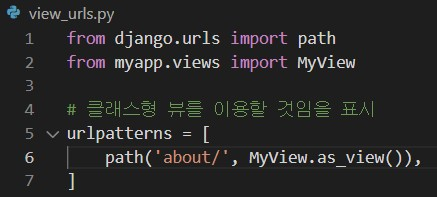

**클래스형 뷰의 url 작성**   

> **진입 메소드 as_view()**   
: 클래스의 인스턴스를 생성하고, 그 인스턴스의 dispatch() 메소드를 호출

> **dispatch()**   
: 요청을 검사하여 GET, POST 등의 어떤 HTTP 메소드로 요청되었는지를 알아낸 다음, 인스턴스 내에서 해당 이름을 갖는 메소드로 요청을 중계해줌 (정의되지 않은 메소드는 HttpReposeNotAllowed 익셉션 발생)


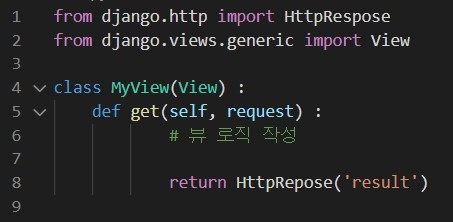

**클래스형 뷰의 작성**

> **클래스형 뷰의 장점**   
> 1. HTTP 메소드 처리 시, IF 함수를 이용하지 않고도 메소드 명으로 구분할 수 있어 구조가 간단해짐

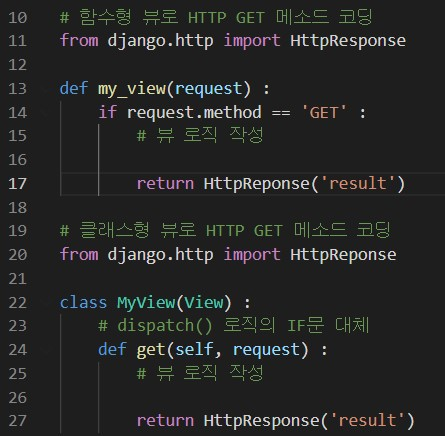

**함수형 뷰외 클래스형 뷰의 비교**

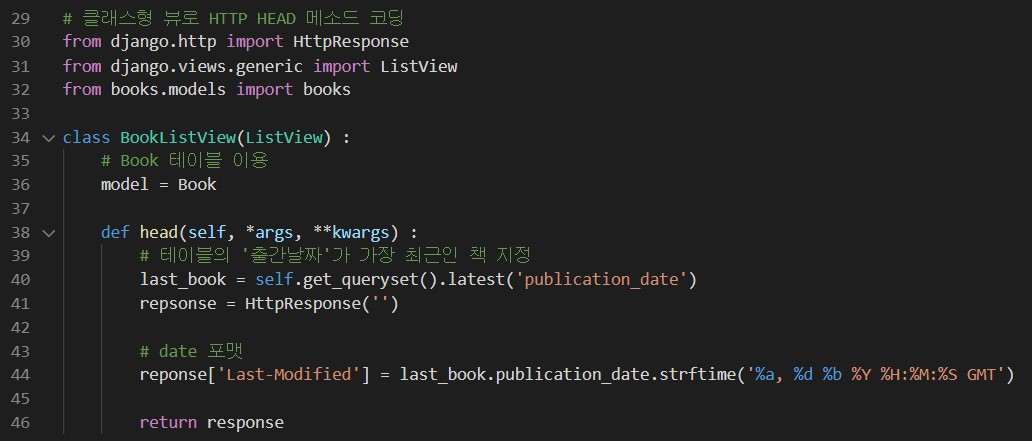

**클래스형 뷰로 HEAD 작성**

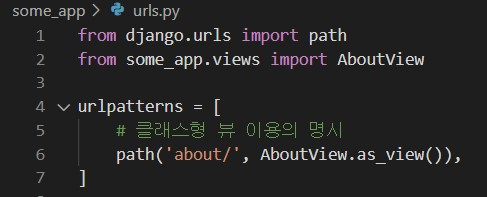

**클래스형 뷰의 urls 작성**

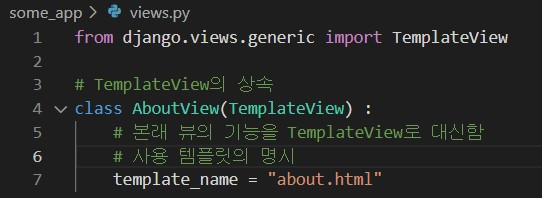

**클래스형 뷰의 상속**

> **클래스형 뷰의 장점**   
> 2. 다중 상속과 같은 객체 지향 기술이 가능해져 코드의 재사용성이나 개발 생산성을 증가시킴

> **제너릭 뷰의 이용**   
> 뷰 개발 과정에서 공통적으로 사용할 수 있는 기능들을 추상화 시키고, 이를 장고에서 미리 만들어 기본적으로 제공해주는 클래스형 뷰

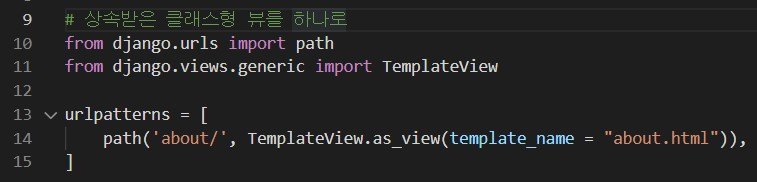

**urls.py에 상속받을 뷰와 표시할 템플릿을 작성하여 클래스형 뷰를 대체**

> **제너릭 뷰의 종류**   
>
> **1. Base View**   
> 1) View : 가장 기본이 되는 제너릭 뷰로, 모든 제너릭 뷰는 View의 하위 클래스   
> 2) TemplateView : 주어진 템플릿을 렌더링   
> 3) RedirectView : URL이 주어지면 해당 URL로 리다이렉트
>
> **2. Generic Display View**   
> 1) ListView : 조건에 맞는 여러 개의 객체를 표시   
> 2) DetailView : 객체 하나에 대한 상세한 정보를 표시
>
> **3. Generic Edit View**   
> 1) FormView : 폼이 주어지면 해당 폼을 보여줌   
> 2) CreateView : 객체를 생성하는 폼을 보여줌   
> 3) UpdateView : 기존 객체를 수정하는 폼을 보여줌   
> 4) DeleteView : 기존 객체를 삭제하는 폼을 보여줌
>
> **4. Generic Date View**   
> 1) ArchiveIndexView : 조건에 맞는 여러 개의 객체 및 그 객체들에 대한 날짜 정보 표시   
> 2) YearArchiveView : 연도가 주어지면 그 연도에 해당하는 객체를 표시   
> 3) MonthArchiveView : 연, 월이 주어지면 그에 해당하는 객체들을 표시   
> 4) WeekArchiveView : 연도와 주차가 주어지면, 그에 해당하는 객체들을 표시   
> 5) DayArchiveView : 연, 월, 일이 주어지면 그 날짜에 해당하는 객체들을 표시   
> 6) TodayArchiveView : 오늘 날짜에 해당하는 객체들을 표시   
> 7) DateDetailView : 연, 월, 일 또는 기본키가 주어지면 그에 해당하는 특정 객체 하나에 대한 상세한 정보를 표시

## * 클래스형 뷰에서의 폼 처리

In [4]:
## 함수형 뷰

from django.http import HttpReponseRedirect
from django.shorcuts import render

from .forms import myForm

def myview(request) :
    if request.method == "POST" :
        form = MyForm(reuqest.POST)
        
        if form.is_valid() :
            # cleaned_date로 로직 처리 
            
            return HttpResponseRedirect('/success/')
        
    else :
        form = MyForm(initial = {'key' : 'value'})
        
    return render(request, 'form_template.html', {'form' : form})

ModuleNotFoundError: No module named 'django'

In [6]:
## 클래스형 뷰

from django.http import HttpReponseRedirect
from django.shortcuts import render
from django.views.generic import View

# 사전에 작성한 폼 클래스 이용
from .forms import MyForm

class MyFormView(View) :
    form_class = MyForm
    initial = {'key' : 'value'}
    template_name = 'form_template.html'
    
    def get(self, request, *args, **kwargs) :
        form = self.form_class(initial = self.initial)
        return render(request, self.template_name, {'form' : form})
    
    def post(slef, request, *args, **kwargs) :
        form = self.form_class(request.POst)
        if form.is_valid() :
            # cleaned_data로 로직 처리
            
            # 유효한 데이터를 가졌을 경우
            return HttpReponseRedirect('/success/')
        
        # 유효하지 않은 데이터를 가졌을 경우
        return render(request, self.template_name, {'form' : form})

ModuleNotFoundError: No module named 'django'

In [7]:
# FormView를 상속받아 처리

from .forms import MyForm
from django.views.generic.edit import FormView

class MyFormView(FormView) :
    form_class = MyForm
    template_name = 'form_template.html'
    success_url = '/thanks/'
    
    def form_valid(self, form) :
        # cleaned_data로 로직 처리
        return super(MyFormView, self).form_valid(form)

ImportError: attempted relative import with no known parent package

> **FormView 주의사항**   
> 1. form_class : 사용자에 보여줄 폼을 정의한 forms.py 내의 클래스 명   
> 2. template_name : 폼을 포함하여 렌더링할 템플릿 파일 이름   
> 3. success_url : MyFormView 처리가 성공적으로 완료되었을 때 리다이렉트 시킬 URL   
> 4. form_valid : 유효한 폼 데이터로 처리할 로직, super을 이용하여 success_url로 리다이렉트 시킴

# 6. 로그 남기기

: 로그는 settings.py의 LOGGING_CONFIG, LOGGING 항목을 참고하여 로깅에 관한 설정을 처리   
  **기본 설정이 없는 경우, 디폴드 로깅으로 처리**   
   -> 실행되는 시점부터 로그가 출력되며, 적절한 로거만 획득하면 원하는 로그를 기록할 수 있음
   
> **로거 구조**   
> LOGGER ---------> HANDLER <------------- FORMATTER   
> 로거는 여러 개의 핸들러(+포매터)를 지정 가능   
> 필터를 두어 로거와 핸들러에 적용 가능   

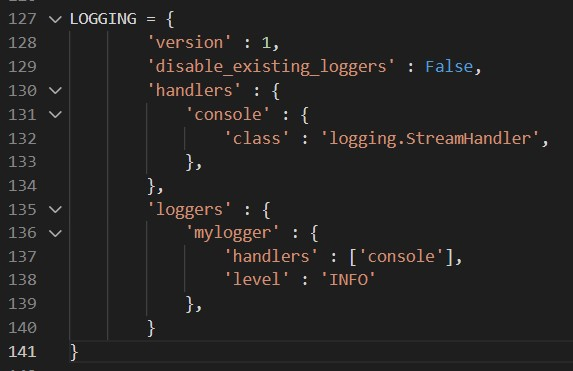

**settings.py에서 로거 생성**

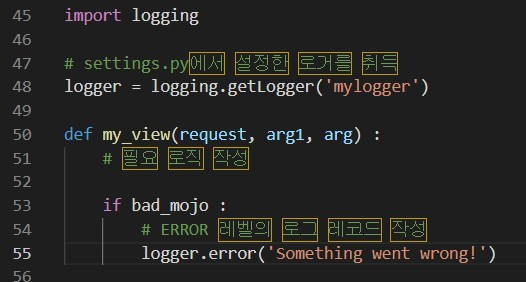

**views.py에서 로거를 실행시키는 함수 작성**

>**로거의 특징**   
> 1. 이름을 가진다. (mylogger)   
> 2. 생성된 로거는 logging.getLogger() 메소드로 호출할 수 있다.   
> 3. **계층화하여 하위 로거는 상위 로거에게 로깅을 전파시킬 수 있다.**   
> ex. logger = logging.getLogger('project.interesting.stuff')   
    > 부모 : project ---> interesting ---> stuff   
    > stuff 로거를 이용해 로깅 시키면 project 로거까지 전파되어 최상단 루트 로거에서 핸들러 하나만 만들어도 하위 로거의 모든 로깅 호출을 잡을 수 있음   
> 4. 계층화의 전파를 비활성화 시킬 수 있다.   


> **로깅 호출 메소드**    
> 1. logger.debug() : DEBUG 레벨의 로그 레코드를 생성   
> 2. logger.info() : INFO 레벨의 로그 레코드를 생성   
> 3. logger.warning() : WARNING 레벨의 로그 레코드를 생성   
> 4. logger.error() : ERROR  레벨의 로그 레코드를 생성   
> 5. logger.critical() : CRITICAL 레벨의 로그 레코드를 생성   
> 6. logger.log() : 원하는 로그 레벨을 정하여 로그 메세지를 생성   
> 7. logger.exception() : 익셉션 스택 트레이스 정보를 포함하는 ERROR 레벨의 로그 메세지를 생성

## 1) 장고의 디폴트 로깅 설정

: 로깅 메세지를 호출했을 때 로그 메세지를 원하는 대로 기록하기 위하여 로거, 핸들러, 필터, 포맷터 등을 설정해야 함

> **사전형 설정**   
> settings.py의 LOGGING 항목에 사전 정의   
> 1. 로거, 핸들러, 필터, 포맷터에 대한 정의   
> 2. 각 컴포넌트의 로그 레벨 정의

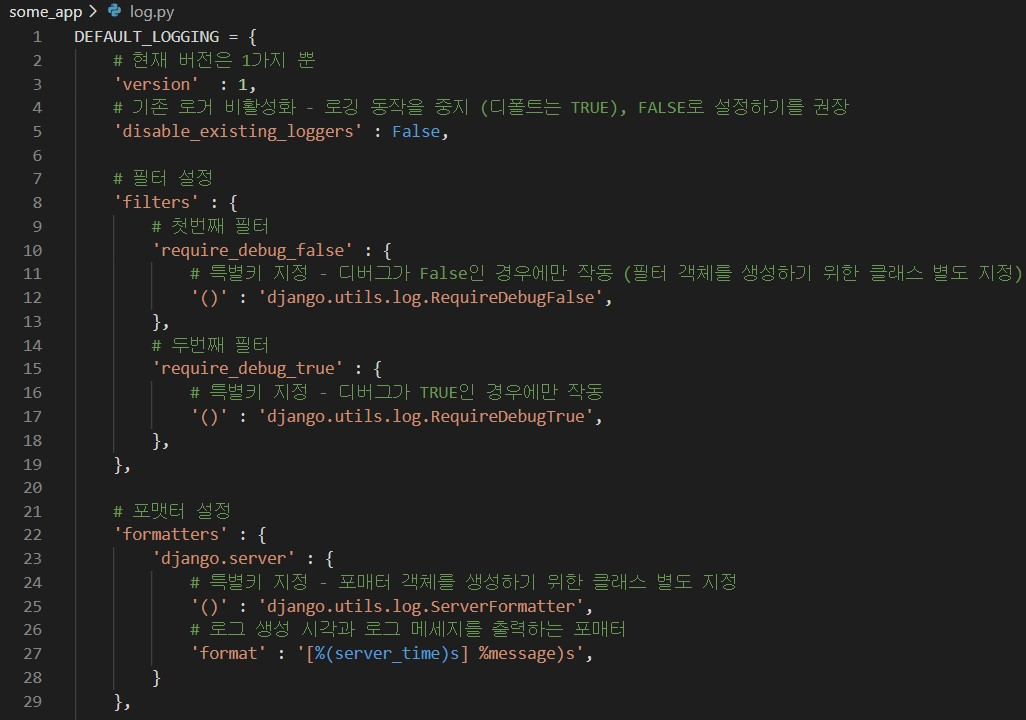

**디폴트 로깅 설정1**

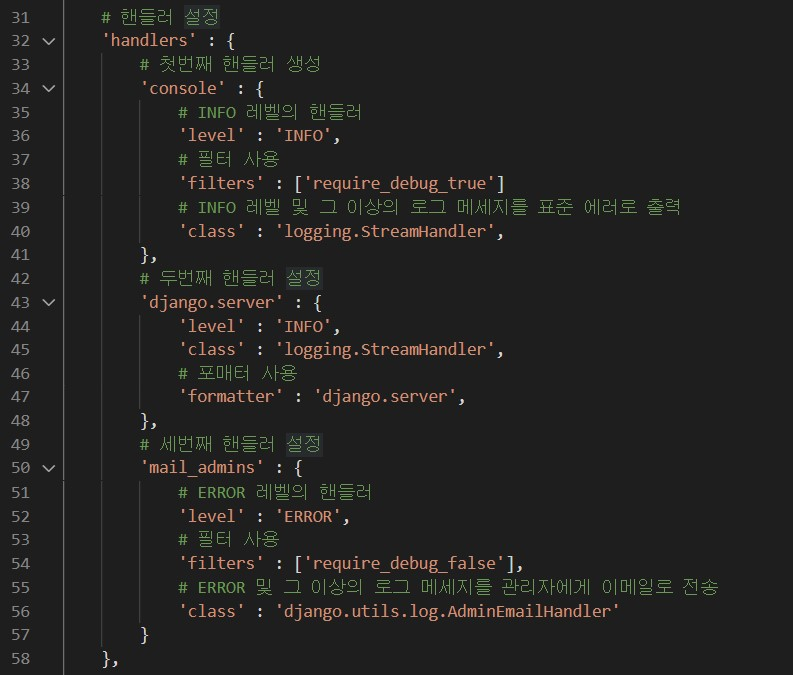

**디폴트 로깅 설정2**

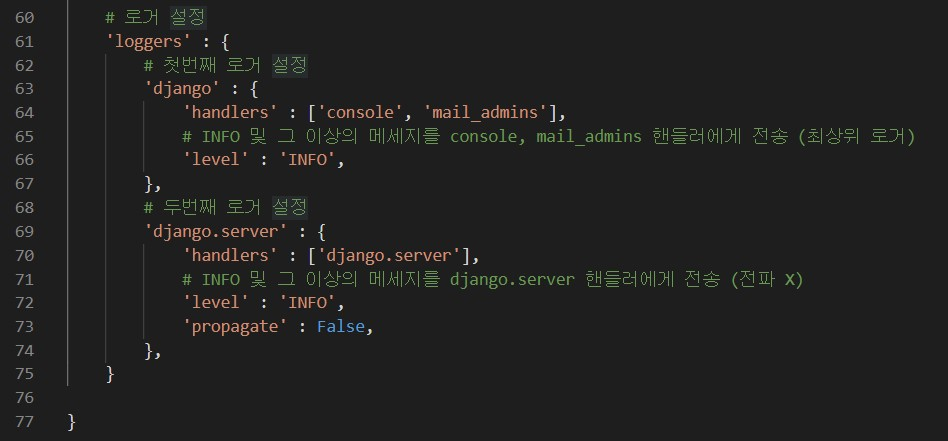

**디폴트 로깅 설정3**

> **디폴트 로깅 설정**   
> 1. Debug = True이면, django.* 계층에서 발생하는 로그 레코드는 INFO 레벨 이상일 때 콘솔로 전송됨   
> 2. Debug = False이면, django.* 계층에서 발생하는 ERROR 레벨 이상일 때 관리자에게 이메일로 전송됨   
> 3. django.server 로거는 DEBUG 값에 무관하게 로그 레코드가 INFO 레벨 이상이면 콘솔로 전송됨   
> -> **다른 로거들과 다르게 django 로거로 전파되지 않음**

> **추가 로깅 설정**   
> 1. django 로거   
> 2. django.request 로거 : 요청 처리와 관련된 메세지를 기록   
    > 5XX : ERROR / 4XX : WARNING   
    > status_code : HTTP 응답 코드   
    > request : 로그 메세지를 요청하는 요청 객체   
> 3. django.server 로거   
> 4. django.template 로거 : 템플릿을 렌더링하는 과정에서 발생하는 로그 메세지를 기록   
> 5. django.db.backends 로거 : DB와 관련된 메세지를 기록   
    > **SQL 로깅은 settings.DEBUG 항목이 TRUE인 경우에만 활성화**   
    > duration : SQL 문장을 실핼하는 데 소요된 시간   
    > sql  : 실행된 SQL 문장   
    > params : SQL 호출에 사용된 파라미터   
> 6. django.security.* 로거 : 보안에 해가 되는 동작에 대한 로그 메세지를 기록   
> 7. django.db.backends.schema 로거 : DB의 스키마 변경 시 사용된 SQL 쿼리를 기록   
> 8. AdminEmailHandler   
> 9. CallBackFilter : 콜백 함수를 지정하여 필터를 통과하는 모든 메세지에 대해 콜백 함수를 호출   
    > **콜백 함수의 리턴값이 FALSE이면 더이상 처리하지 않음**   
> 10. RequireDebugFalse   
> 11. RequireDebugTrue

## 2) 장고의 디폴트 로깅 변형

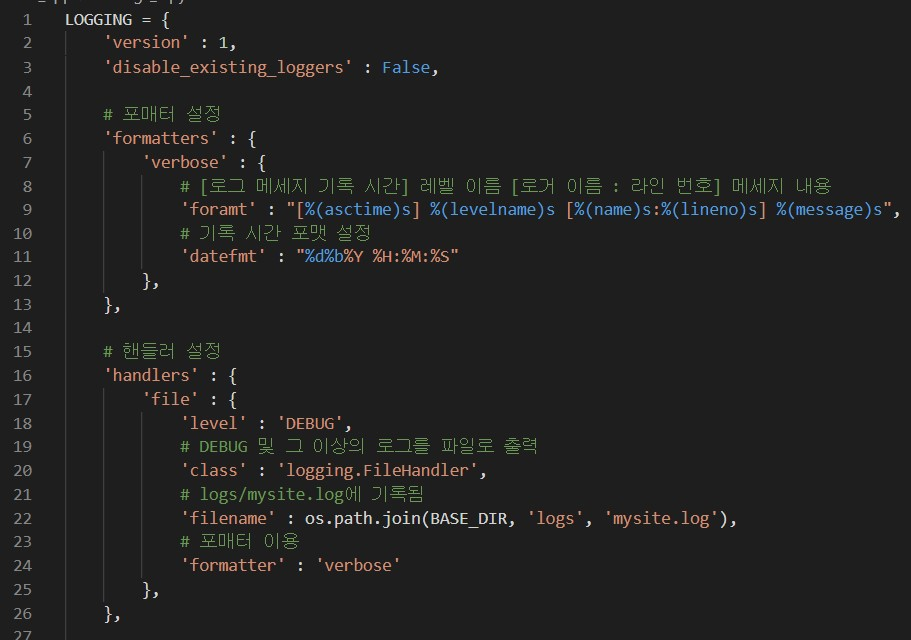

**기존의 디폴트 형식을 유지하며 설정을 추가함**

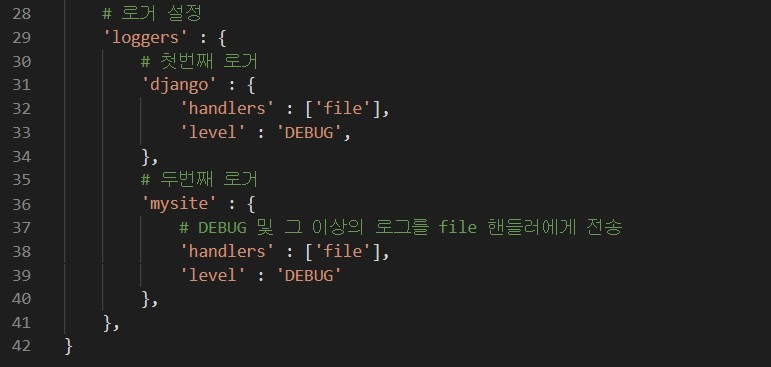

## 3) 사용자 설정 로깅

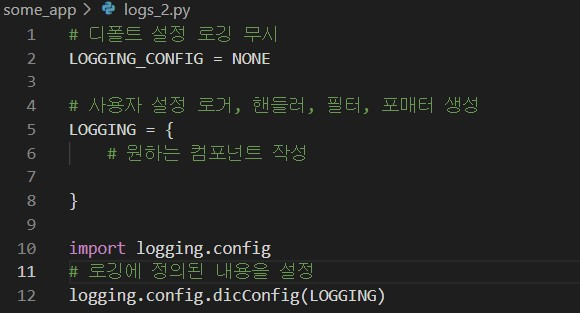

**원하는 방식으로 로깅을 설정함**